In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A glance of Available data

In [98]:
df = pd.read_csv("stroke_patients_admissions.csv",
                     header=0)

In [99]:
# This stroke_patient_admission.csv contains 2025 admission records of stroke patients.
df.shape

(2025, 26)

In [100]:
## Look into how many sample with target variable: 30 days readmission
df[['hadm_id','isreadmitted']].groupby('isreadmitted').count()

,hadm_id
isreadmitted,
0,1934
1,91


In [101]:
## Look into how many sample with target variable: Mortality
df[['hadm_id','isdead']].groupby('isdead').count()

,hadm_id
isdead,
0,1433
1,592


In [102]:
# Looking at the numbers of missing value in each column
df.isnull().sum()

row_id                     0
subject_id                 0
hadm_id                    0
admittime                  0
dischtime                  0
deathtime               1433
admission_type             0
admission_location         0
discharge_location         0
insurance                  0
language                 694
religion                  30
marital_status           182
ethnicity                  0
edregtime                210
edouttime                210
diagnosis                  0
hospital_expire_flag       0
has_chartevents_data       0
icd9_code                  0
lengthofstay               0
isdead                     0
isreadmitted               0
dob                        0
gender                     0
age                        0
dtype: int64

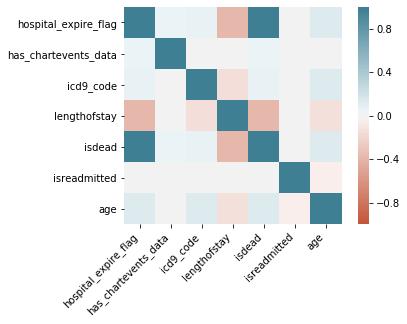

In [103]:
# Looking into the correlation between each numberical variables
corr = df.iloc[:,6:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Looking at the distribution of length of stay

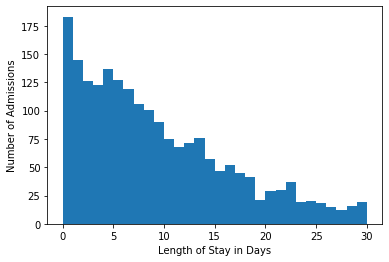

In [104]:
#Looking at the distribution of length of stay
plt.hist(df.lengthofstay, bins = 30)
plt.xlabel('Length of Stay in Days')
plt.ylabel('Number of Admissions')
plt.show()

## NLP Clinical data preparation

In [96]:
# Import another csv which combines the notes with each admission

df2 = pd.read_csv("stroke_patients_admissions_withnotes.csv",
                     header=0)

####  The average number of clinical notes recorded in each admisson is 45, the minimal is 1 and the maxium is 489.

In [92]:
df2[['hadm_id','row_id']].groupby('hadm_id').count().describe()

,row_id
count,1963.000000
mean,34.226184
std,45.623484
min,1.000000
25%,9.000000
50%,18.000000
75%,41.000000
max,489.000000
